# Using Synthesis Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x=np.array([95,85,80,70,60])
y=np.array([85,95,70,65,70])

In [3]:
model= np.polyfit(x, y, 1)

In [4]:
model

array([ 0.64383562, 26.78082192])

In [5]:
predict = np.poly1d(model)
predict(65)

68.63013698630135

In [6]:
y_pred= predict(x)
y_pred

array([87.94520548, 81.50684932, 78.28767123, 71.84931507, 65.4109589 ])

In [9]:
from sklearn.metrics import r2_score
r2_score(y, y_pred)

0.4803218090889323

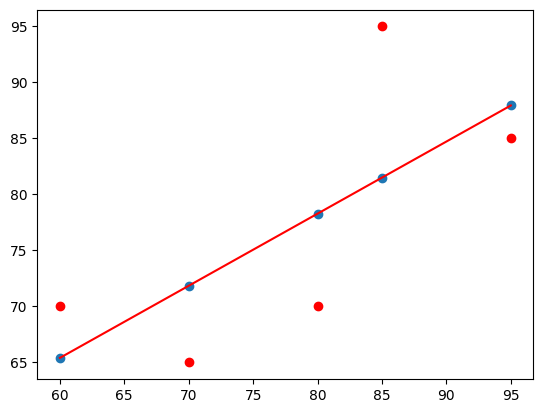

In [13]:
y_line = model[1] + model[0]* x
plt.plot(x, y_line, c = 'r') 
plt.scatter(x, y_pred) 
plt.scatter(x,y,c='r')

# Using California Housing Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import fetch_california_housing
boston = fetch_california_housing()

In [3]:
data = pd.DataFrame(boston.data, columns=boston.feature_names)
data['PRICE'] = boston.target
data.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
PRICE         0
dtype: int64

In [4]:
x = data.drop(['PRICE'], axis=1)
y = data['PRICE']

In [5]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [6]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(x_train, y_train)

LinearRegression()

In [7]:
y_train_pred = lm.predict(x_train)
y_test_pred = lm.predict(x_test)
df_train = pd.DataFrame({'Actual': y_train, 'Predicted': y_train_pred})
df_test = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

In [8]:
from sklearn.metrics import mean_squared_error, r2_score
mse_train = mean_squared_error(y_train, y_train_pred)
print("MSE (Train):", mse_train)

MSE (Train): 0.5234413607125448


In [9]:
mse_test = mean_squared_error(y_test, y_test_pred)
print("MSE (Test):", mse_test)

MSE (Test): 0.5289841670367214


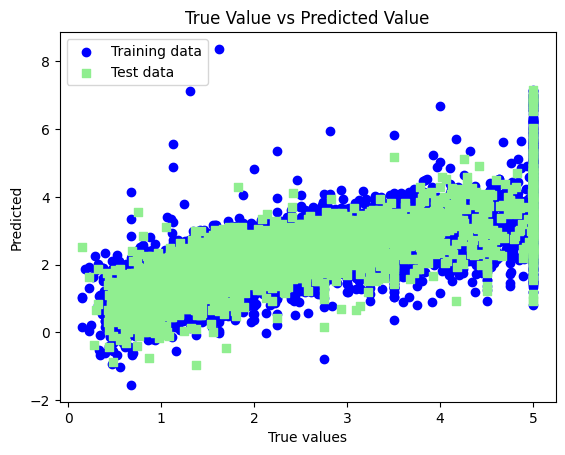

In [10]:
plt.scatter(y_train, y_train_pred, c='blue', marker='o', label='Training data')
plt.scatter(y_test, y_test_pred, c='lightgreen', marker='s', label='Test data')
plt.xlabel('True values')
plt.ylabel('Predicted')
plt.title("True Value vs Predicted Value")
plt.legend(loc='upper left')
plt.show()